### import libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

### %matplotlib inline
### matplotlib.rcParams['figure.figsize'] = (12,8)

### pd.options.mode.chained_assignment = None


### Read csv from path location 

In [6]:
df = pd.read_csv(r'C:\Users\Hanso\Downloads\kaggle movies\movies.csv')


### Looking At The Data

In [8]:

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


### Checking For Missing Data

In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


### Looking At Table data Types

In [12]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

### Altering budget, gross, columns to Whole Numbers

In [14]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 

In [15]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0


### create correct year column

In [16]:
df['yearcorrect'] = df['released'].astype(str).str.split(', ').str[-1].astype(str).str[:4]
print(df.head(n=10))

                                             name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   
5                                 Friday the 13th      R     Horror  1980   
6                              The Blues Brothers      R     Action  1980   
7                                     Raging Bull      R  Biography  1980   
8                                     Superman II     PG     Action  1980   
9                                 The Long Riders      R  Biography  1980   

                            released  score      votes            director  \
0      June 13, 1980 (United States)    8.4   927000.0     Stanley Kubrick

### Highest Gross Earning Films

In [18]:
df.sort_values(by='gross', inplace=True, ascending=False)
print(df.head(n=10))

                                              name rating      genre  year  \
6663    Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                        Avengers: Infinity War  PG-13     Action  2018   
7480                                 The Lion King     PG  Animation  2019   
6653                                Jurassic World  PG-13     Action  2015   
6043                                  The Avengers  PG-13     Action  2012   
6646                                     Furious 7  PG-13     Action  2015   
7494                                     Frozen II     PG  Animation  2019   
6644                       Avengers: Age of Ultron  PG-13     Action  2015   
7247                                 Black Panther  PG-13     Action  2018   
5845  Harry Potter and the Deathly Hallows: Part 2  PG-13  Adventure  2011   

                               released  score      votes         director  \
6663  December 18, 2015 (United States)    7.8   876000.0      

### Altering The Display values to show maxium results

In [20]:
### pd.set_option('display.max_rows', None)
### df.head

### Altering The Display values to show manium results

In [22]:
pd.set_option('display.max_rows', None)
print(df.head(n=20))

                                              name rating      genre  year  \
6663    Star Wars: Episode VII - The Force Awakens  PG-13     Action  2015   
7244                        Avengers: Infinity War  PG-13     Action  2018   
7480                                 The Lion King     PG  Animation  2019   
6653                                Jurassic World  PG-13     Action  2015   
6043                                  The Avengers  PG-13     Action  2012   
6646                                     Furious 7  PG-13     Action  2015   
7494                                     Frozen II     PG  Animation  2019   
6644                       Avengers: Age of Ultron  PG-13     Action  2015   
7247                                 Black Panther  PG-13     Action  2018   
5845  Harry Potter and the Deathly Hallows: Part 2  PG-13  Adventure  2011   
7075       Star Wars: Episode VIII - The Last Jedi  PG-13     Action  2017   
7271                Jurassic World: Fallen Kingdom  PG-13     Ac

In [23]:
df.head()


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012


### Dropping duplicate Records full display results

In [25]:
### df['company'].drop_duplicates().sort_values(ascending=False)
### df.head

### Dropping duplicate Records showing 30 unipue results

In [27]:
unique_companies = df['company'].drop_duplicates().sort_values(ascending=False)
n = 30  # Number of unique companies to display
top_n_companies = unique_companies.head(n)

# Display the top n unique companies
print(top_n_companies)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

### Creating A Scattter Plot Showing Budget VS gross Income

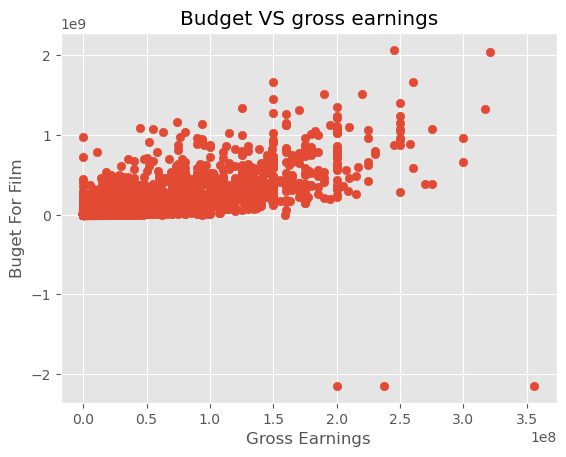

In [29]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget VS gross earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Buget For Film')
plt.show()

### Plot Budget VS Gross Using Seaborn

<Axes: xlabel='budget', ylabel='gross'>

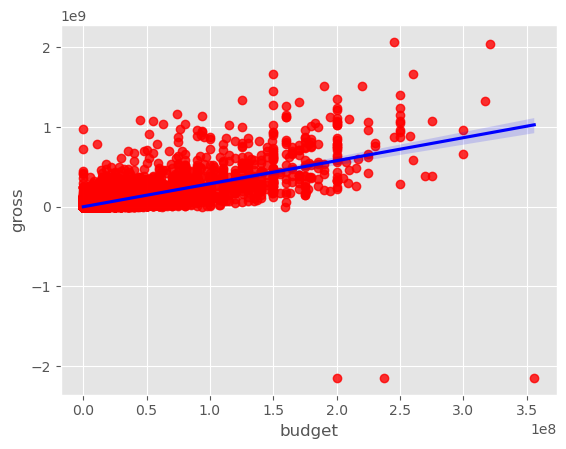

In [31]:
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

### Looking At Correlation methods, (pearson, kendall, spearman)

In [33]:
df.corr(numeric_only=True)

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.256331,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.169406,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.573889,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.687124,0.269510
gross,0.256331,0.169406,0.573889,0.687124,1.000000,0.204177
runtime,0.120811,0.399451,0.309212,0.269510,0.204177,1.000000


### changing selected fields to a numeric value to look at the correlations

In [35]:
df_numerized = df

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

print(df_numerized.head(n=20))
        


      name  rating  genre  year  released  score      votes  director  writer  \
6663  5144       5      0  2015       698    7.8   876000.0      1125    2550   
7244   536       5      0  2018       192    8.4   897000.0       162     743   
7480  6194       4      2  2019      1488    6.9   222000.0      1455    1919   
6653  2969       5      0  2015      1704    7.0   593000.0       517    3568   
6043  5502       5      0  2012      2472    8.0  1300000.0      1517    2314   
6646  2145       5      0  2015       221    7.1   370000.0      1189     706   
7494  2131       4      2  2019      2676    6.8   148000.0       432    1950   
6644   534       5      0  2015      2235    7.3   777000.0      1517    2314   
7247   791       5      0  2018       959    7.3   661000.0      2457    3795   
5845  2407       5      1  2011      1445    8.1   790000.0       679    4052   
7075  5145       5      0  2017       661    7.0   581000.0      2282    3518   
7271  2970       5      0  2

### After Testing The Above Methods Spearman Offered The Highest Correlation

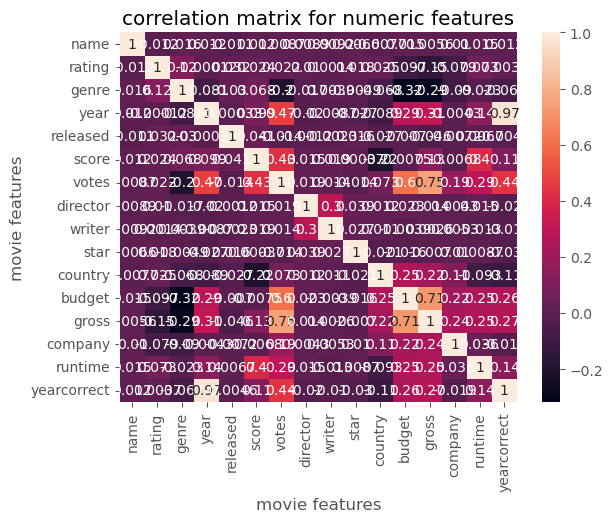

In [37]:
correlation_matrix = df_numerized.corr('spearman') ### numeric_only=True
sns.heatmap(correlation_matrix, annot = True)
plt.title('correlation matrix for numeric features')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

### for easier visualisation am using unstack matrix

In [39]:
correlation_matr = df_numerized.corr()
corr_pairs = correlation_matr.unstack()
corr_pairs
print(corr_pairs.head(n=20))

name    name           1.000000
        rating        -0.008069
        genre          0.016355
        year           0.011453
        released      -0.011311
        score          0.017097
        votes          0.013088
        director       0.009079
        writer         0.009081
        star           0.006472
        country       -0.010737
        budget         0.020548
        gross          0.013895
        company        0.009211
        runtime        0.010392
        yearcorrect    0.011711
rating  name          -0.008069
        rating         1.000000
        genre          0.072423
        year           0.008779
dtype: float64


### using unstacked in pairs

In [41]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs
print(sorted_pairs.head(n=20))

budget       genre         -0.334021
genre        budget        -0.334021
             gross         -0.229534
gross        genre         -0.229534
votes        genre         -0.145307
genre        votes         -0.145307
country      score         -0.133348
score        country       -0.133348
gross        rating        -0.095355
rating       gross         -0.095355
country      yearcorrect   -0.092522
yearcorrect  country       -0.092522
budget       rating        -0.081939
rating       budget        -0.081939
genre        year          -0.081261
year         genre         -0.081261
country      runtime       -0.078412
runtime      country       -0.078412
company      genre         -0.071067
genre        company       -0.071067
dtype: float64


### Drilling down paired correlation values

In [43]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes        gross          0.573889
gross        votes          0.573889
budget       gross          0.687124
gross        budget         0.687124
yearcorrect  year           0.962250
year         yearcorrect    0.962250
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

### budget and gross have the highest correlation to gross earnings